## Masks external data

in this notebook the masks for the external data are created. The external data is the ITC-VD dataset. The dataset contains images of different sizes and the bounding box coordinates for the images are stored in MAT-Files. The MAT-Files are loaded and the coordinates are extracted. The coordinates are then used to create a mask in form of an array. The array is then saved as a npy file. The npy files are then used to train the model.

In [24]:
import scipy.io


In [3]:
import os
import numpy as np
from PIL import Image


/Users/jonaserbacher/PycharmProjects/DetectingCars/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Analysing the MAT-Files to understand the structure of the data and find the bounding box coordinates

In [7]:
mat_file_path = '../preprocessing/ITC_VD_Training_Testing_set/Testing/Image/00007.mat'

In [8]:
mat = scipy.io.loadmat(mat_file_path)

In [10]:
print("Schlüssel:" + str(mat.keys()))

Schlüssel:dict_keys(['__header__', '__version__', '__globals__', 'x00007'])


In [21]:
coord_key = list(mat.keys())[3]

In [22]:
print("Schlüssel:" + coord_key)

Schlüssel:x00007


### like shown in the readMe of the dataset, the coordinates for the bounding boxes are stored in the 0-3 columns

In [23]:
print("Inhalt:" + str(mat[coord_key]))

Inhalt:[[ 711  236  749  278  749  230]
 [ 941  103  971  137  940  144]
 [ 694  436  732  468  689  438]
 ...
 [5575 3297 5615 3321 5574 3311]
 [5587 3324 5615 3345 5587 3336]
 [3980 3283 4005 3326 4002 3326]]


In [41]:
# the first 4 columns contain the coordinates for the bounding boxes
# function to extract the coordinates
def extract_bbox_coordinates(mat_file_path):
    mat_data = scipy.io.loadmat(mat_file_path)
    coord_key = list(mat_data.keys())[3]
    bbox_coordinates = mat_data[coord_key][:, :4]
    return bbox_coordinates

In [42]:
# function to create the mask in form of an array from the coordinates
def create_npy_from_bbox(image_size, bbox_coordinates):
    mask_array = np.zeros(image_size, dtype=np.uint8)

    for bbox in bbox_coordinates:
        x1, y1, x2, y2 = bbox[:4]
        mask_array[y1:y2, x1:x2] = 1

    return mask_array


In [44]:
# path to the train folders
training_gt_folder = '../preprocessing/ITC_VD_Training_Testing_set/Training/GT'
training_images_folder = '../preprocessing/ITC_VD_Training_Testing_set/Training/Image'

In [45]:
# iterate through the images in the training folder
for filename in os.listdir(training_images_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(training_images_folder, filename)
        mat_file_path = os.path.join(training_gt_folder, f"{os.path.splitext(filename)[0]}.mat")

        # load the image to get its size
        image = Image.open(image_path)
        image_size = (image.height, image.width)

        # extract the bounding box coordinates
        bbox_coordinates = extract_bbox_coordinates(mat_file_path)

        # create the npy file
        npy_array = create_npy_from_bbox(image_size, bbox_coordinates)

        # save the npy file
        output_npy_path = os.path.join(training_gt_folder, f"{os.path.splitext(filename)[0]}.npy")
        np.save(output_npy_path, npy_array)

In [51]:
# path to the Testing folders
testing_gt_folder = '../preprocessing/ITC_VD_Training_Testing_set/Testing/GT'
testing_images_folder = '../preprocessing/ITC_VD_Training_Testing_set/Testing/Image'

In [52]:
# iterate through the images in the testing folder
for filename in os.listdir(testing_images_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(testing_images_folder, filename)
        mat_file_path = os.path.join(testing_gt_folder, f"{os.path.splitext(filename)[0]}.mat")

        # load the image to get its size
        image = Image.open(image_path)
        image_size = (image.height, image.width)

        # extract the bounding box coordinates
        bbox_coordinates = extract_bbox_coordinates(mat_file_path)

        # create the npy file
        npy_array = create_npy_from_bbox(image_size, bbox_coordinates)

        # save the npy file
        output_npy_path = os.path.join(testing_gt_folder, f"{os.path.splitext(filename)[0]}.npy")
        np.save(output_npy_path, npy_array)

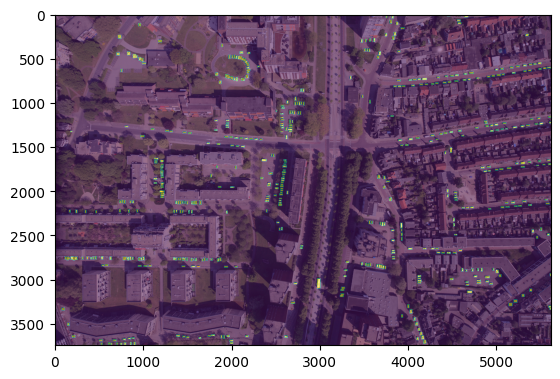

In [4]:
import matplotlib.pyplot as plt

# load the image and the mask to see if everything worked
image = np.array(Image.open("../preprocessing/ITC_VD_Training_Testing_set/Testing/Image/00007.jpg"))
mask = np.load("../preprocessing/ITC_VD_Training_Testing_set/Testing/GT/00007.npy")
plt.imshow(image)
plt.imshow(mask,alpha=0.5)
plt.plot();